In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
# import the combined CSV file and have the 'date' column parsed as datetime upon import
df = pd.read_csv('../data/formatted/combined.csv',
                 parse_dates=['date'])

In [3]:
# preview the contents
print(df.head())

        date    open    high     low   close  volume ticker
0 1983-03-21  8.9675  9.0300  8.8101  8.9975  510800    AMD
1 1983-03-22  8.7176  8.9675  8.4977  8.4977  328000    AMD
2 1983-03-23  8.4977  8.8101  8.4677  8.7176  427200    AMD
3 1983-03-24  8.7176  8.7801  8.6551  8.7801  393200    AMD
4 1983-03-25  8.9051  9.0600  8.7476  8.8726  210400    AMD


In [4]:
# check general types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62320 entries, 0 to 62319
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62320 non-null  datetime64[ns]
 1   open    62320 non-null  float64       
 2   high    62320 non-null  float64       
 3   low     62320 non-null  float64       
 4   close   62320 non-null  float64       
 5   volume  62320 non-null  int64         
 6   ticker  62320 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.3+ MB
None


In [5]:
# check for nulls
print(df.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64


In [6]:
# print the stats for each stock ticker
for ticker in df['ticker'].unique():
    print(ticker, '\n', df.loc[df['ticker'] == ticker].describe(), '\n')

AMD 
                                 date          open          high  \
count                          10337  10337.000000  10337.000000   
mean   2003-09-12 09:27:48.530521344     20.074938     20.495762   
min              1983-03-21 00:00:00      1.620000      1.690000   
25%              1993-06-09 00:00:00      6.190000      6.331000   
50%              2003-09-10 00:00:00     11.000000     11.250000   
75%              2013-12-13 00:00:00     17.245300     17.560200   
max              2024-03-22 00:00:00    213.410000    227.300000   
std                              NaN     28.138655     28.712830   

                low         close        volume  
count  10337.000000  10337.000000  1.033700e+04  
mean      19.629457     20.067434  2.055504e+07  
min        1.610000      1.620000  3.200000e+03  
25%        6.062500      6.180000  1.797000e+06  
50%       10.750000     10.990000  8.632800e+06  
75%       16.900000     17.245300  2.665750e+07  
max      208.220000    211.3800

In [7]:
# a simple function to plot the 
def line_graph(ticker, col):
    x = df[df['ticker'] == ticker]['date']
    y = df[df['ticker'] == ticker][col]

    fig, ax = plt.subplots(figsize=(16, 8))
    #ax.plot(x, y)
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    sns.lineplot(x=x, y=y, ax=ax)
    ax.set_title(ticker + ' : ' + col.capitalize())
    plt.show()

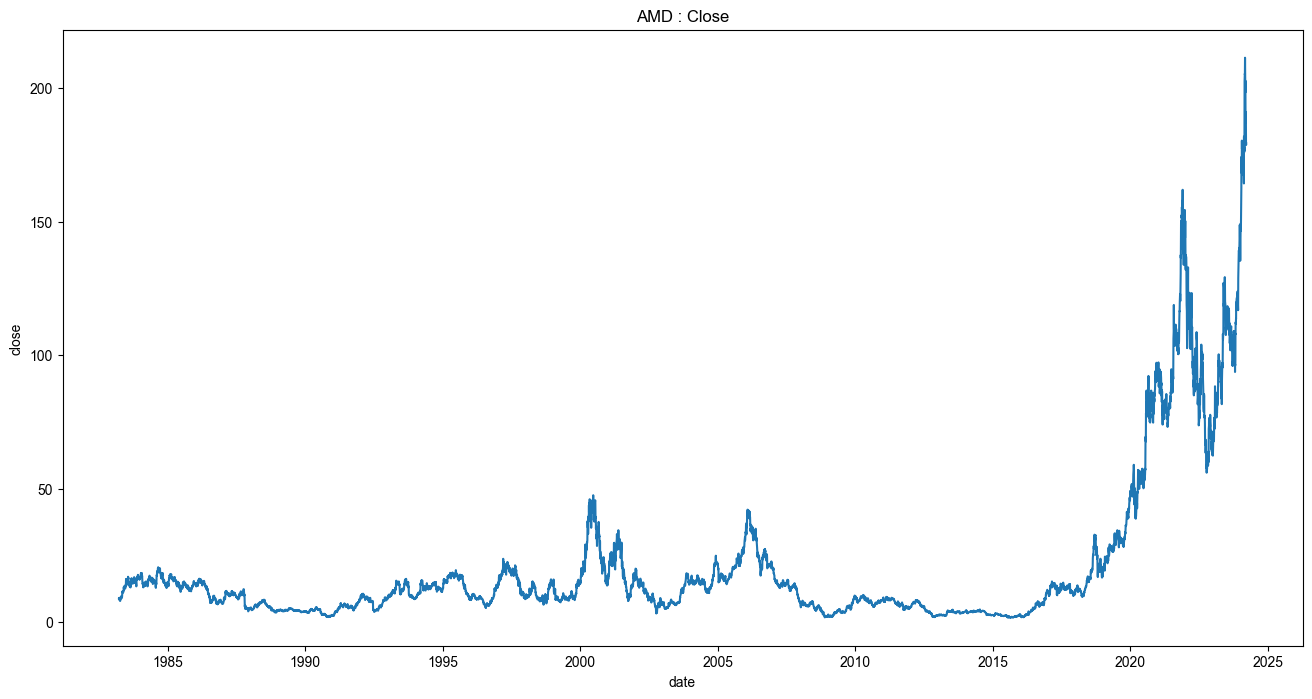

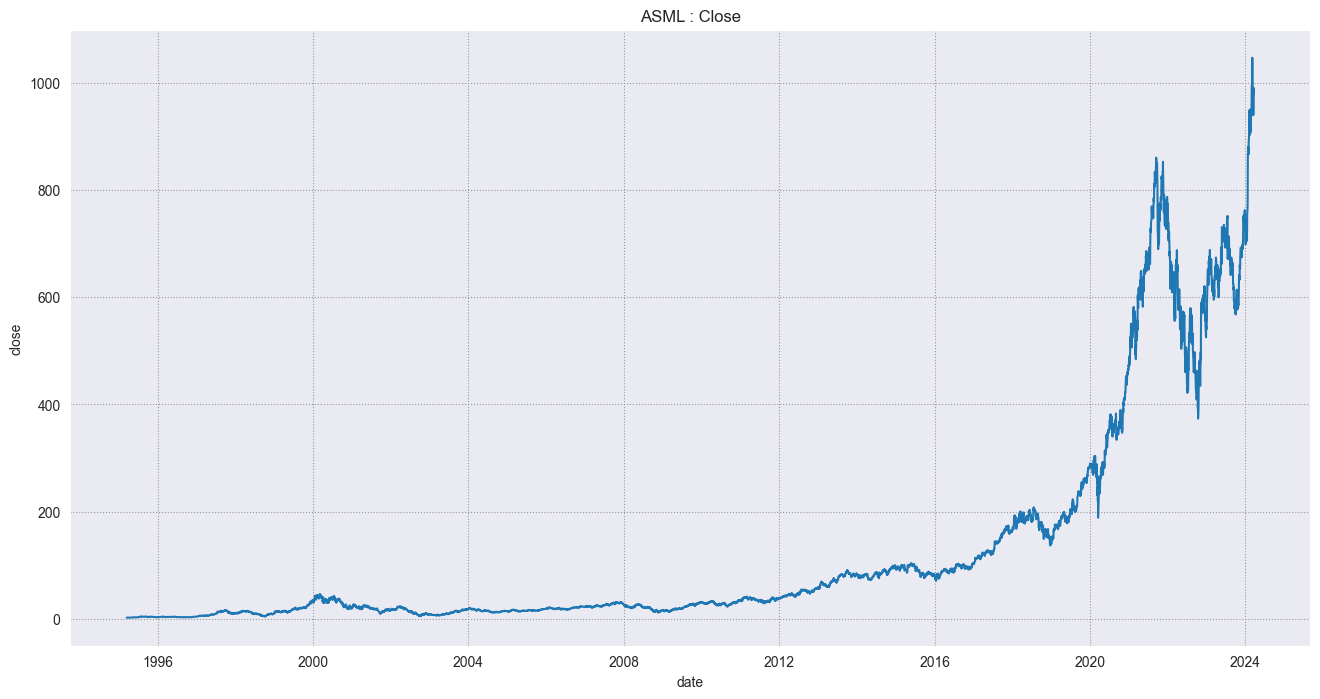

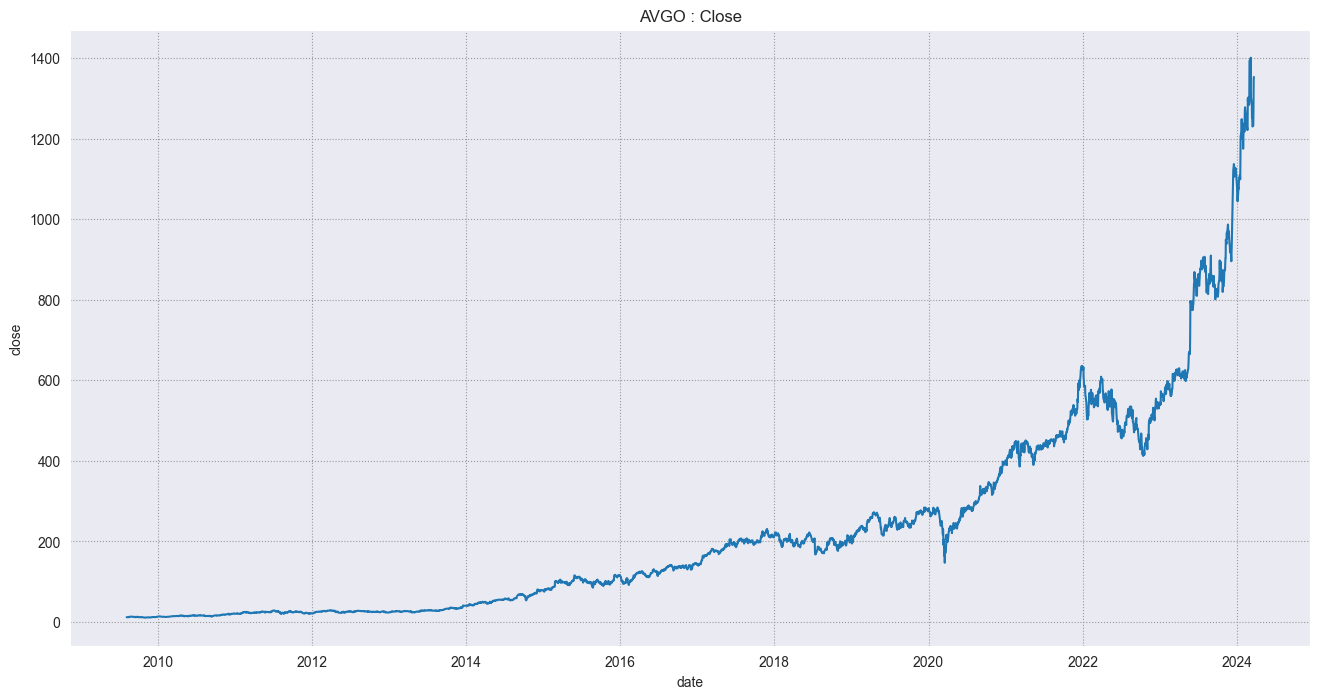

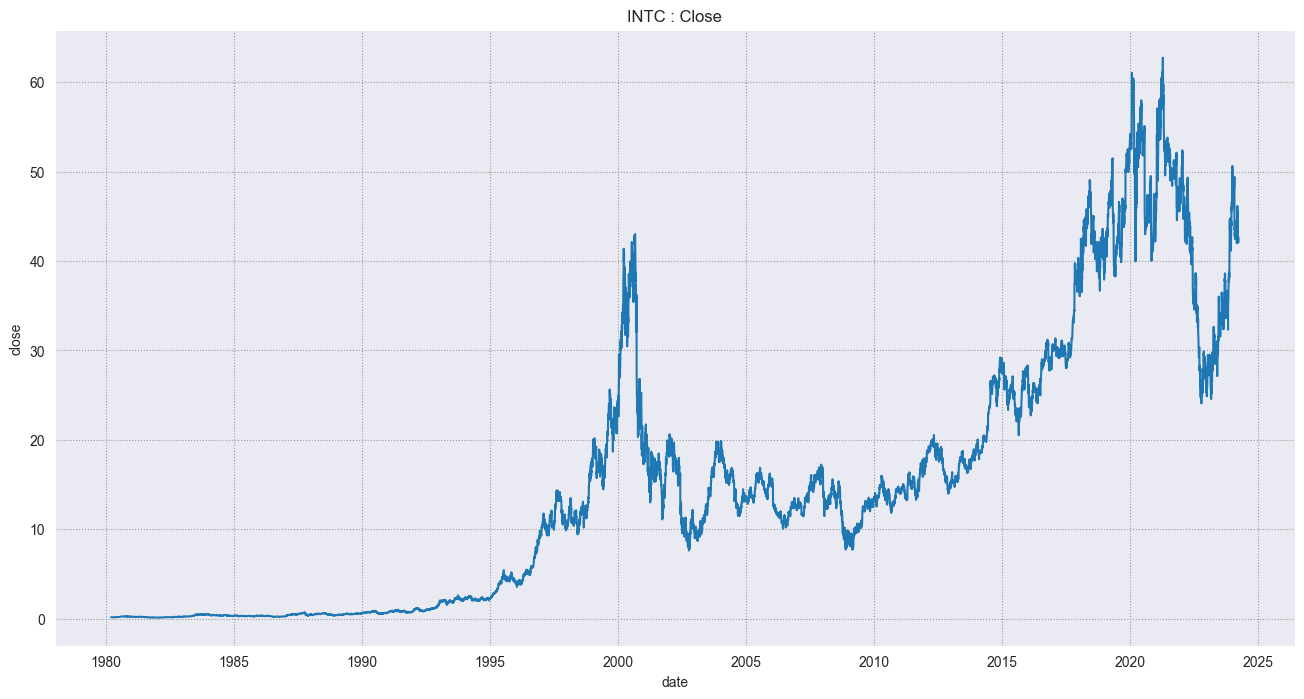

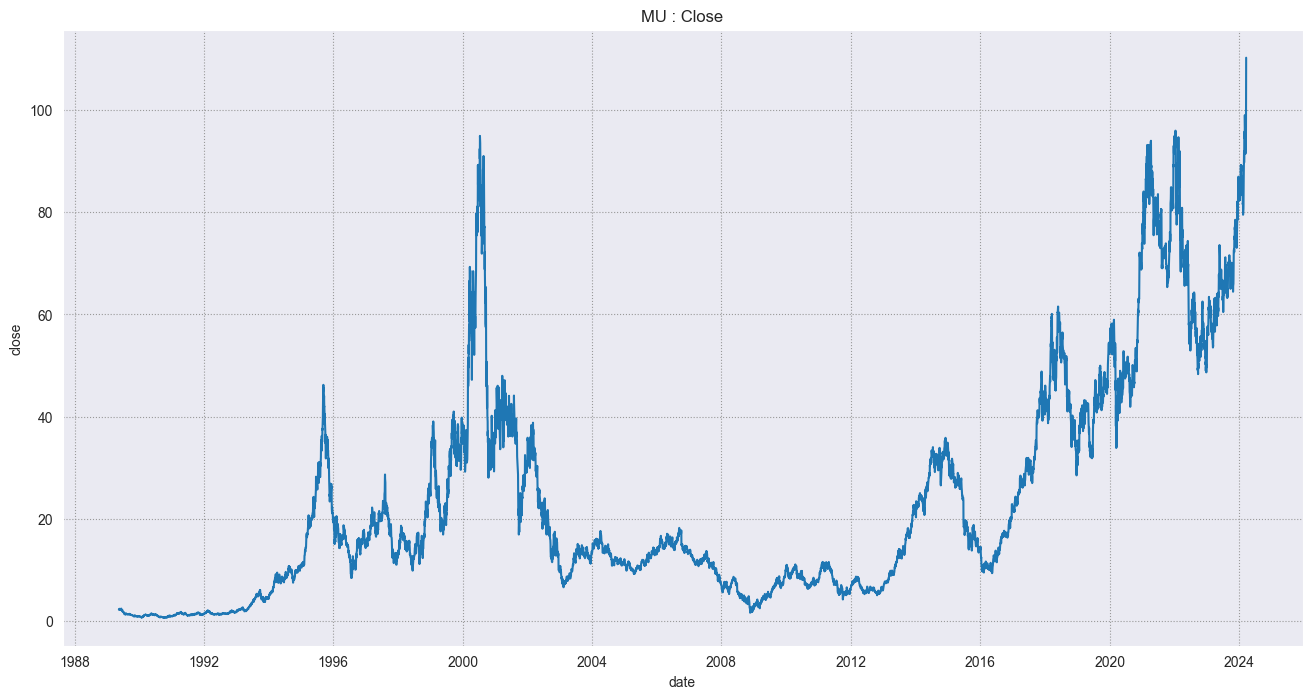

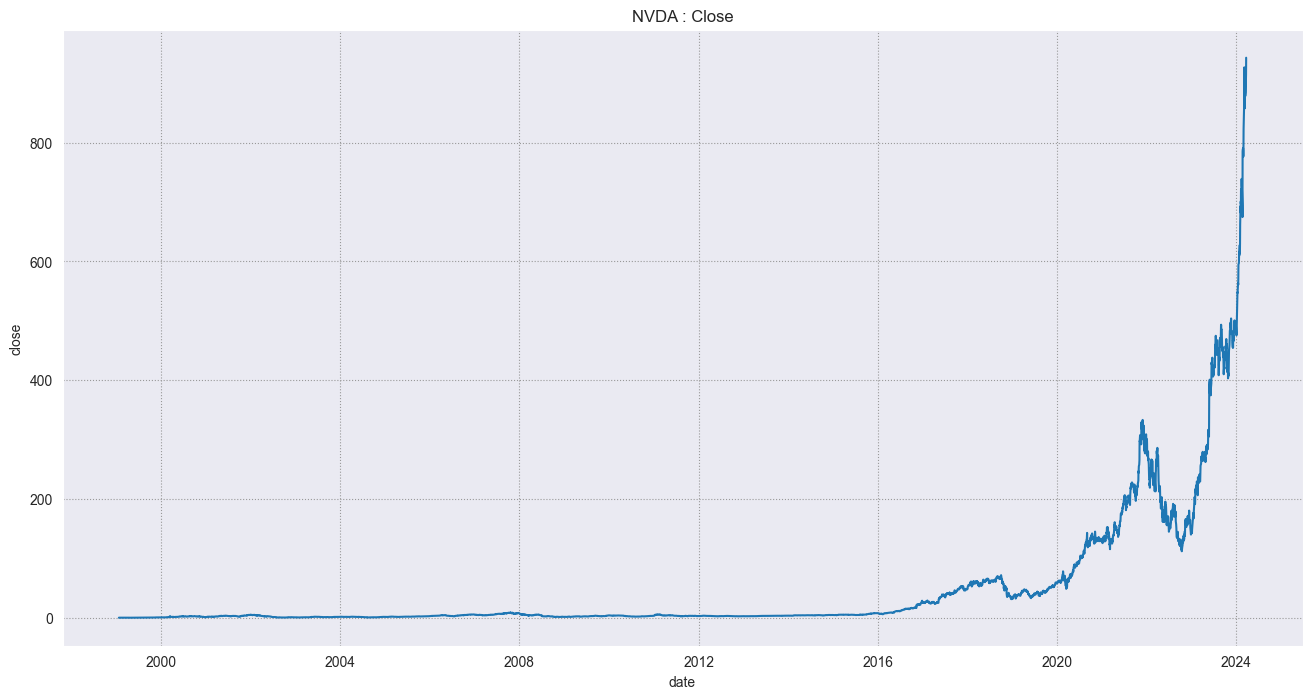

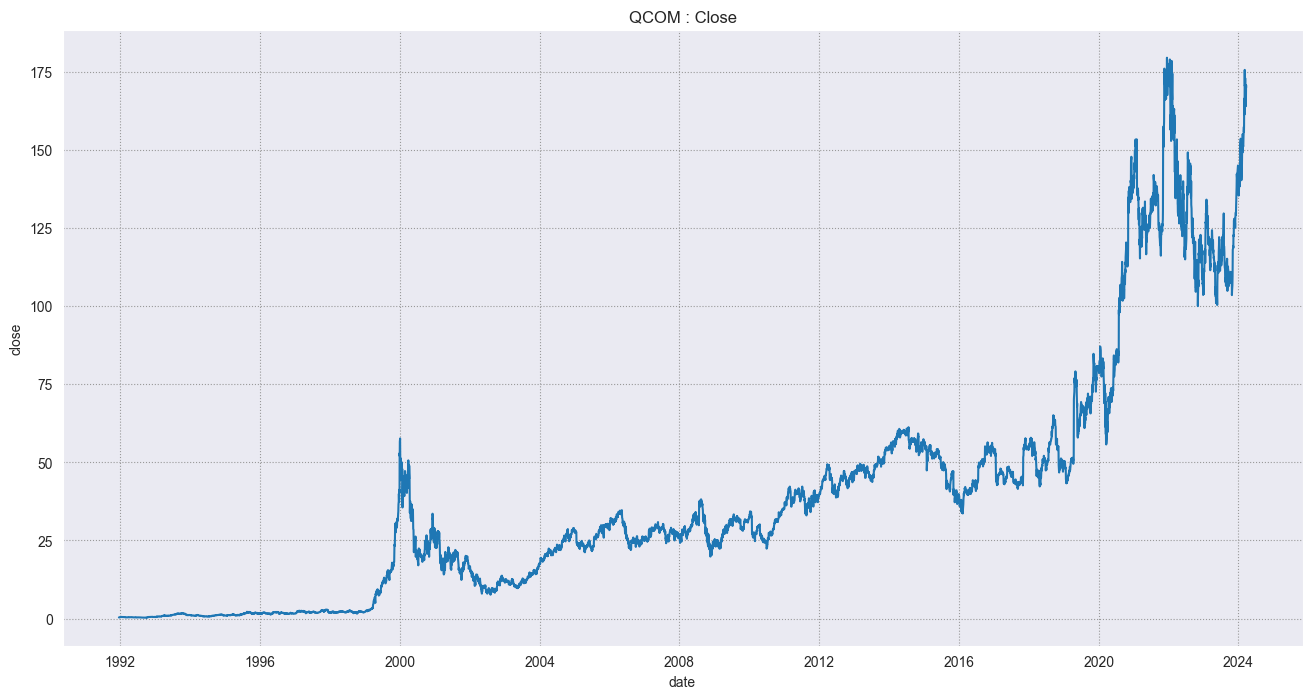

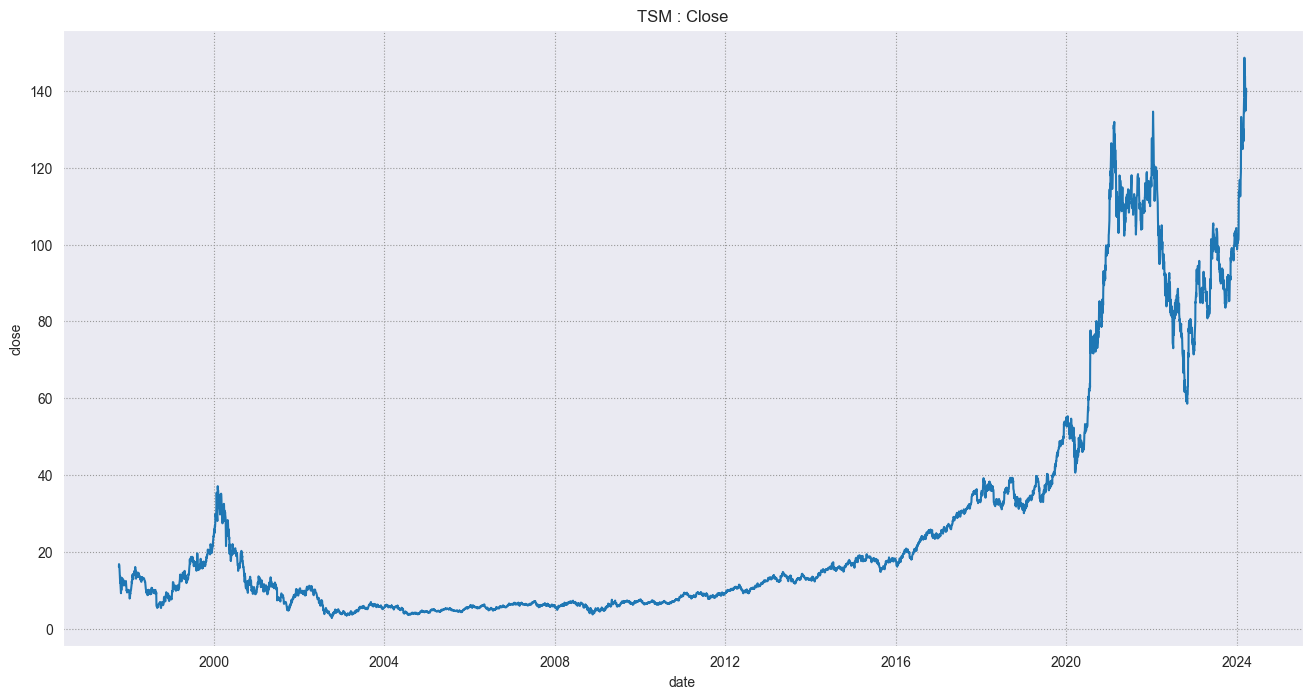

In [9]:
# graph the closing for each of the stock tickers
for ticker in df['ticker'].unique():
    line_graph(ticker, 'close')